Welcome to PatternFinder! In this JupyterNotebook, we're going to poke around some Bach fugues.

We'll start by introducing the 'Finder' object. Each family of content-based retrieval algorithms implemented in PatternFinder has a Finder object responsible for its execution. In this notebook, we use a group of geometric algorithms developed at the University of Helsinki.

Additionally, PatternFinder is built on top of music21, which we rely on for various music processing tasks, so we'll import that too.

In [35]:
#import path # to change the jupyter notebook working directory
import music21
import sys
import os
import more_itertools
import yaml
sys.path.insert(0, 'C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\PatternFinder')
from patternfinder.geometric_helsinki import *

In [52]:
#Configurar rutas de music21
us = music21.environment.UserSettings()
# get environment
env = music21.environment.Environment()

# check the path
print('Environment settings:')
print('musicXML:  ', env['musicxmlPath'])
print('musescore: ', env['musescoreDirectPNGPath'])
os.path.exists(env['musescoreDirectPNGPath'])
# set path if necessary
env['directoryScratch'] = r'C:\tmp' 
# env['musescoreDirectPNGPath'] = 'path/to/your/museScore'
#us['musescoreDirectPNGPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe' 
#us['musicxmlPath'] = r'C:\Program Files\MuseScore 3\bin\MuseScore3.exe

Environment settings:
musicXML:   c:\Users\ferna\Documents\Desarrollo\Python\C:\Program Files\MuseScore 3\MuseScore.exe
musescore:  C:\Program Files\MuseScore 3\bin\MuseScore3.exe
5  archivos
['Archivos MusicXML', 'Archivos en software de notación', 'Corpus.gsheet', 'Documentos de análisis de patrones', 'Textos originales']


Finder objects are generators. They receive as input a 'pattern' and 'source'. Then on each iteration, a Finder will return an occurrence of the pattern within the source, until it has exhaustively looked through the entire source and yields a 'StopIteration' exception. 

We'll start by making our first Finder object. The pattern and source inputs can be paths to music files, or music21 Stream objects. 

Then, let's find the first statement of the subject in BWV 847. We use ground truth data from the [Algomus](http://algomus.fr) fugue analysis project (which was mostly based on Bruhn's 1993 analysis) to define the start and ending beats of the subject.

INFO:patternfinder.geometric_helsinki.finder:Creating Finder with: 
pattern <music21.stream.Score 0x2117ab1d540>
 source <music21.stream.Score 0x21106083df0>
 settings 
{'scale': 'warped', 'source_window': 5, 'threshold': 'all'}
INFO:patternfinder.geometric_helsinki.algorithms:Creating a W1 algorithm with:
 pattern <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x211797b4340>
 source <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x2117ab1f6a0>
 settings {'algorithm': 'auto',
 'interval_func': <function Finder._validate_interval_func.<locals>.<lambda> at 0x0000021179258F70>,
 'mismatches': 0,
 'pattern': <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x211797b4340>,
 'pattern_window': 1,
 'scale': 'warped',
 'source': <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x2117ab1f6a0>,
 'source_window': 5,
 'threshold': 21}
INFO:patternfinder.geometric_helsinki.algorithms:Computing intra pattern vectors...
INFO:patternfinder.geo

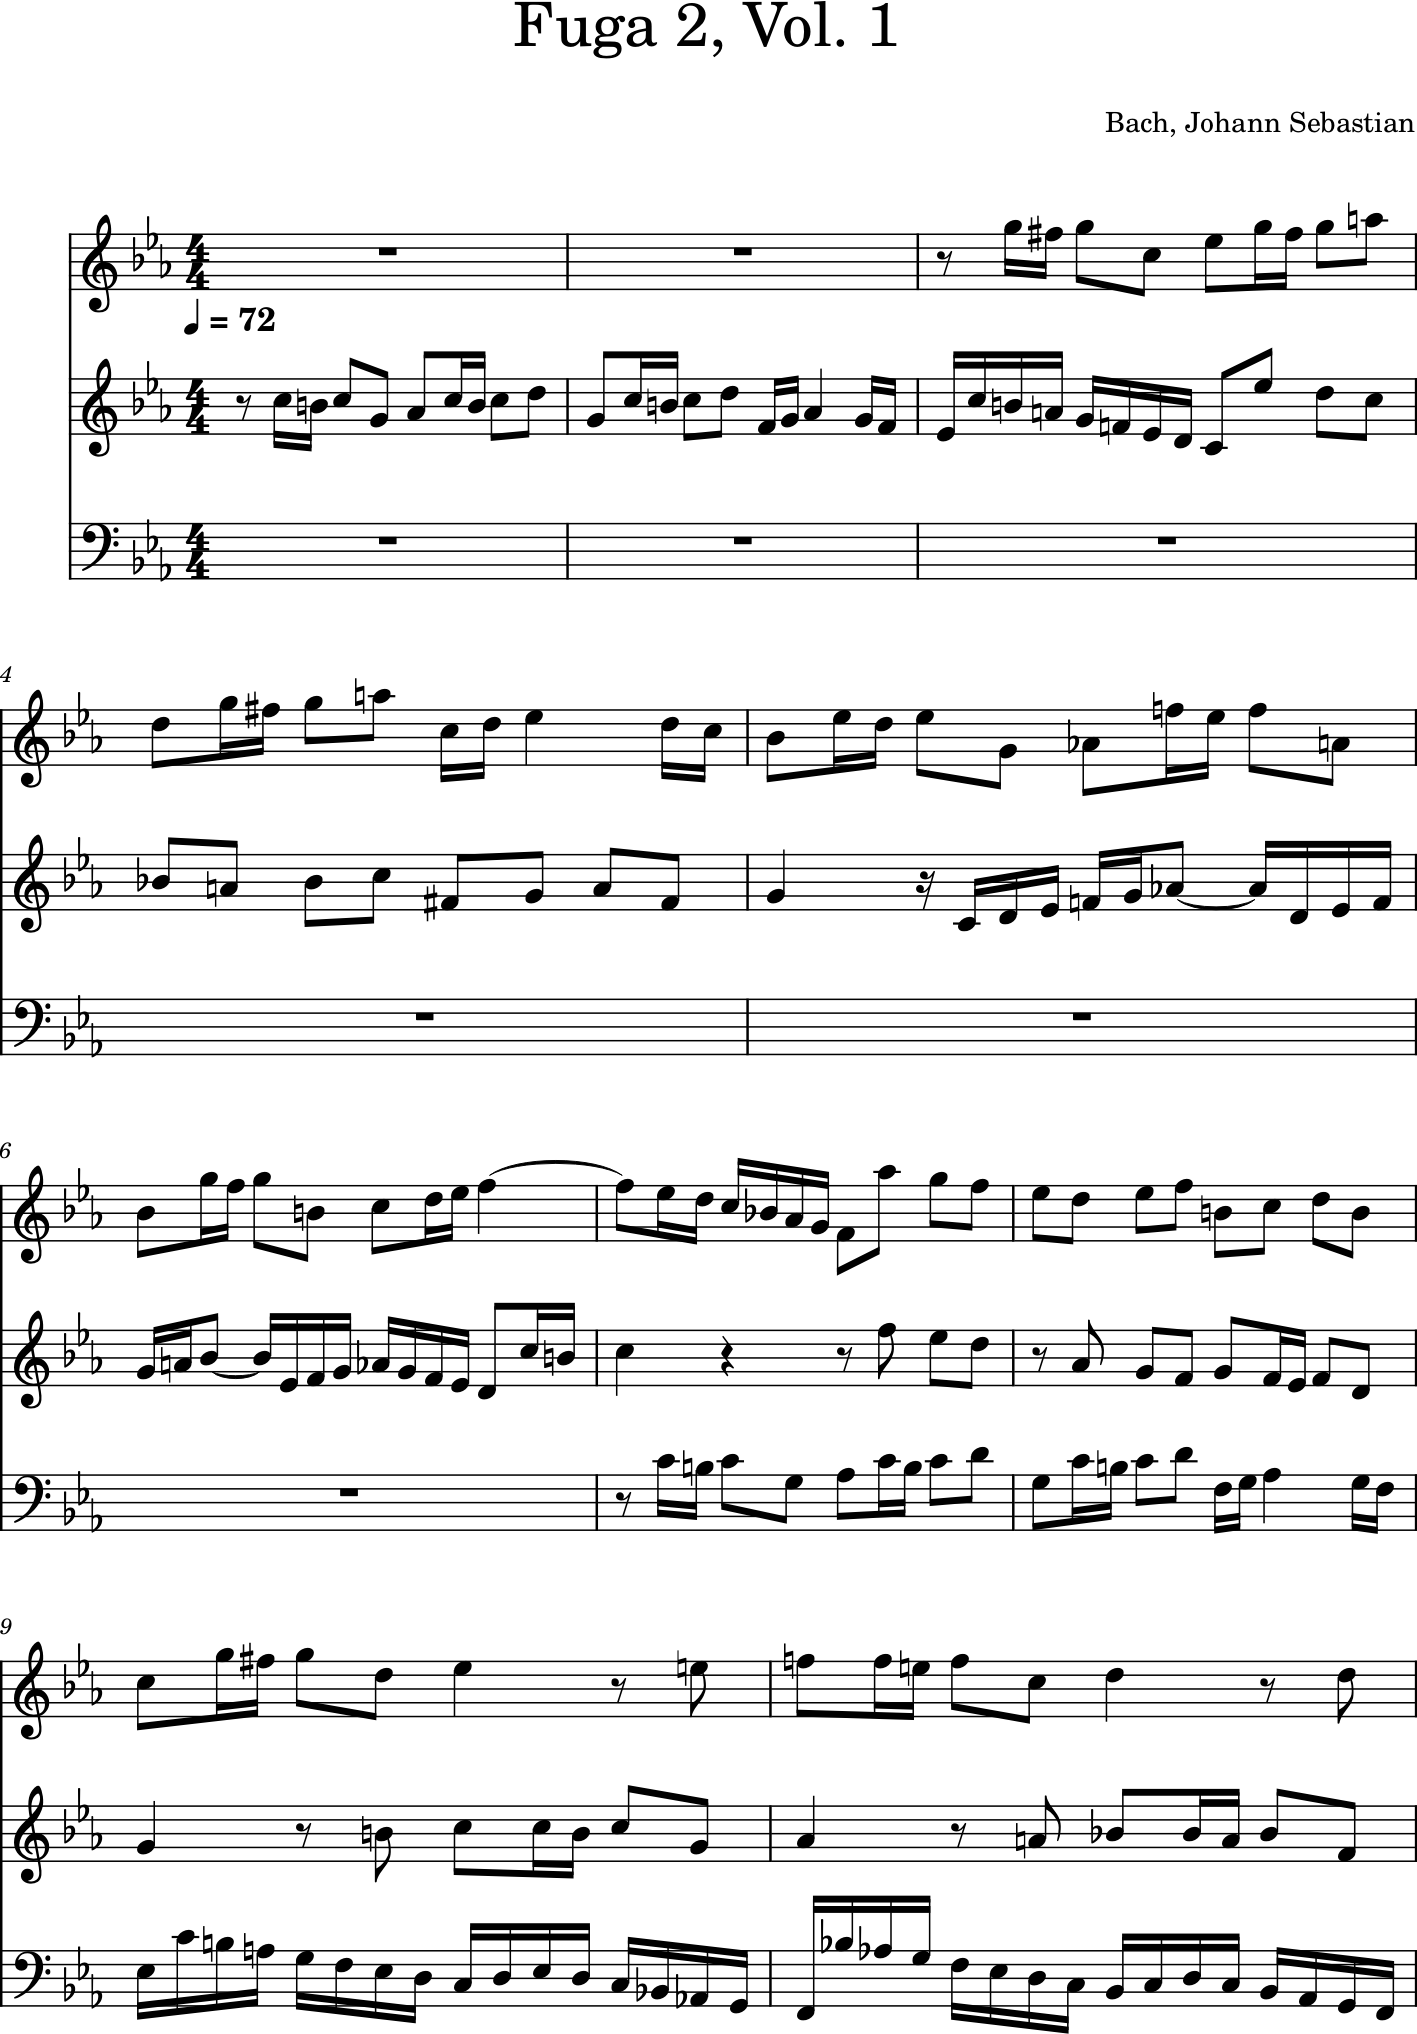

In [51]:
pattern = music21.converter.parse('C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\PatternFinder\\music_files\\bach_wtc1\\e_wtc1f02_S.xml') # BWV847 subject, as defined by the Algomus project
source = music21.converter.parse('C:\\Users\\ferna\\Documents\\Desarrollo\\Python\\PatternFinder\\music_files\\bach_wtc1\\wtc1f02.krn')
#source.show()
#pattern.show()
mass_finder = Finder(pattern, source,threshold='all',scale='warped',source_window=5)
# Colour all occurrences red in the score
for occurrence in mass_finder:
    occurrence.color_source_notes('red')
    output = mass_finder.source.show()






# fugue_finder = Finder(pattern, source,threshold=0.9),) # You can input file names or Music21 
# occ = next(fugue_finder)
# print(occ.offset, occ.notes)
# occ.get_excerpt(color='blue').show()

We've found the first occurrence! Occurrences are custom Music21Objects with a built-in function to generate the surrounding context of the score in which they occur. Let's see this on the following occurrence of the subject.

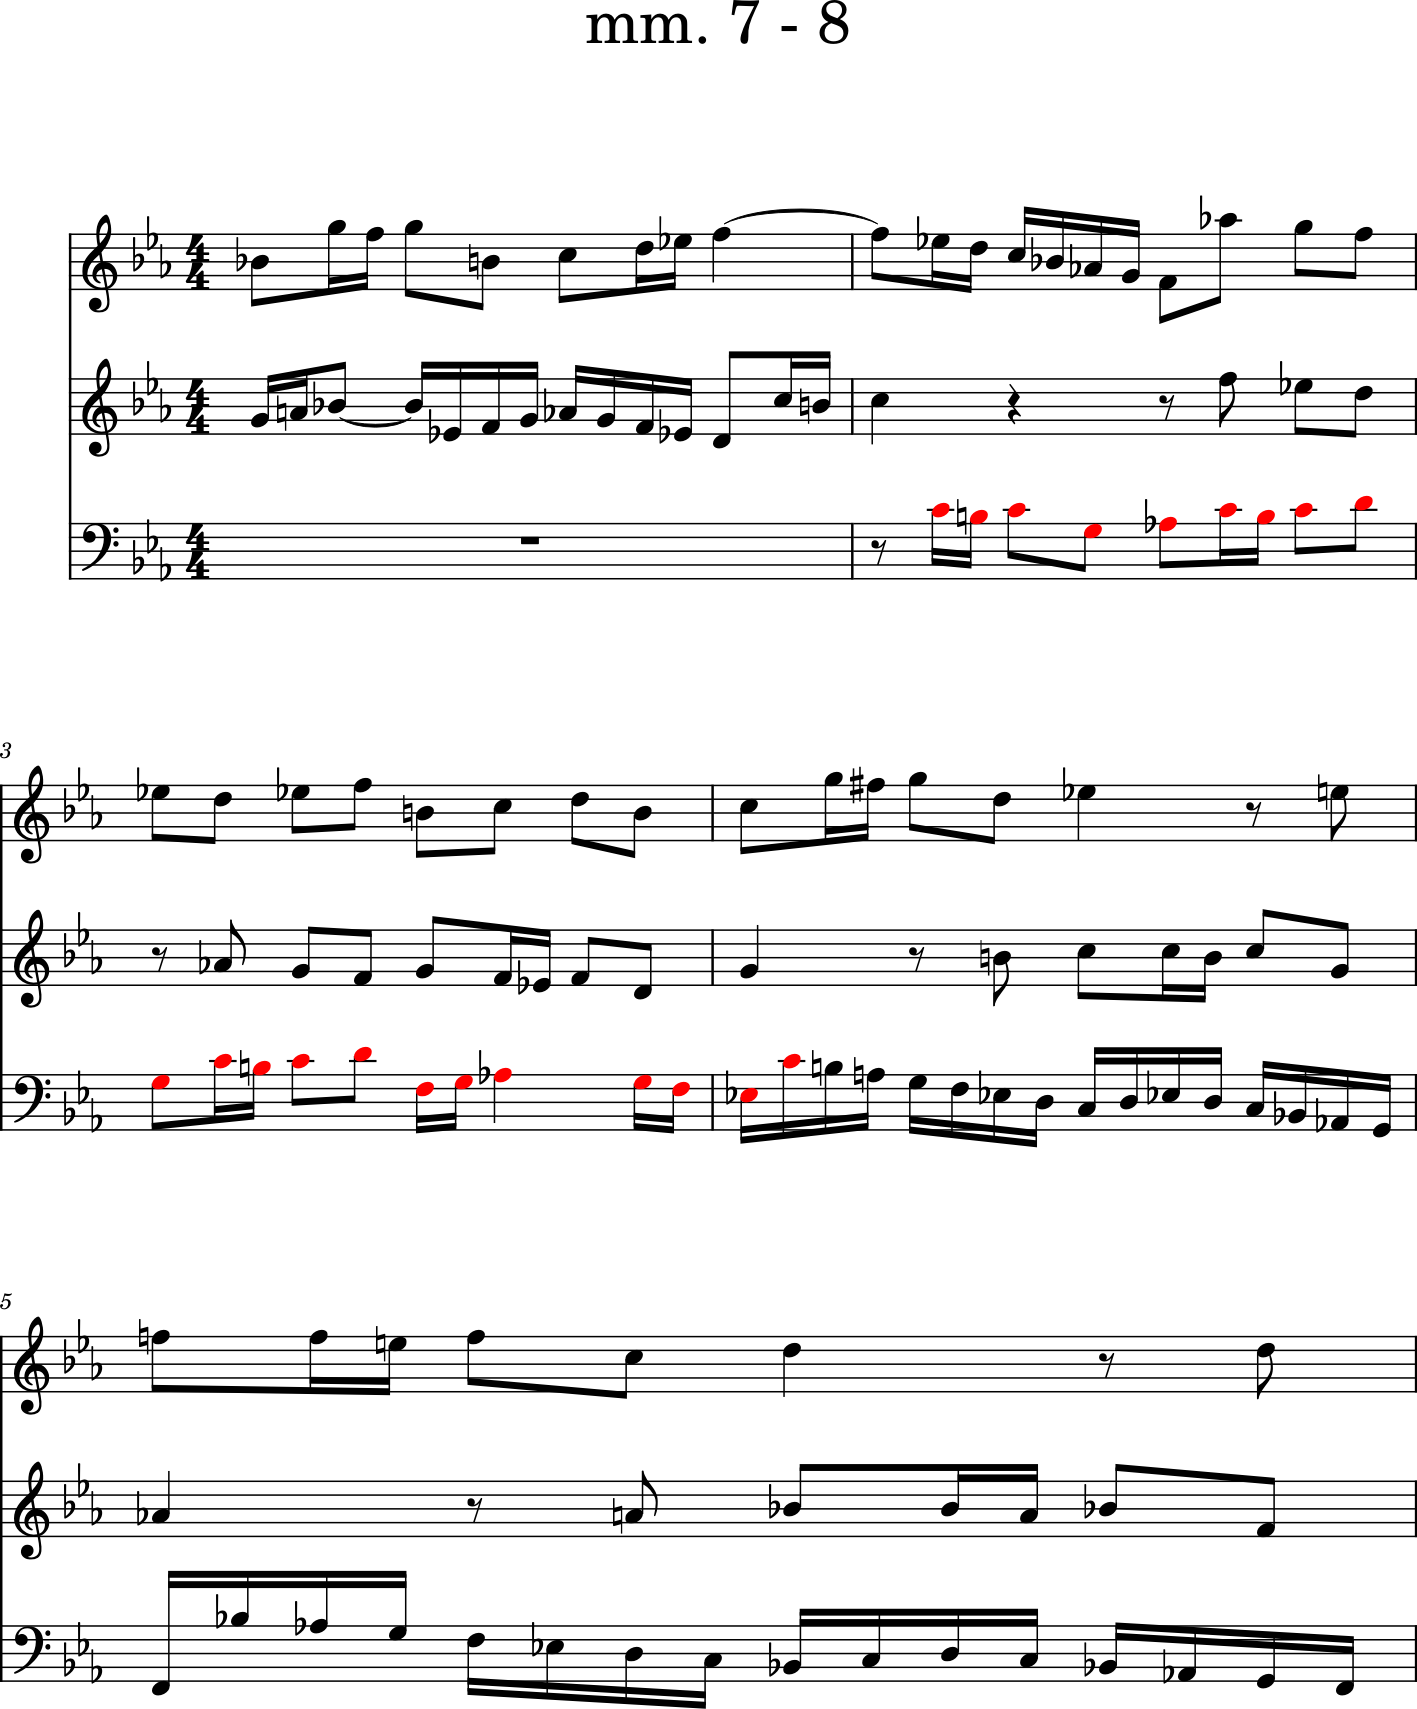

In [31]:
# Show the surrounding context (1 extra bar to the left, 2 extra bars to the right) of the next occurrence
next(fugue_finder).get_excerpt(left_padding=1, right_padding=2).show()

Are there any more **exact** occurrences of the subject, as we've defined it, in this fugue?

In [32]:
next(fugue_finder)

StopIteration: 

I guess not. But don't fret! PatternFinder isn't totally useless. This just means the rest of the subject statements are slightly modified; maybe they are missing a note or two, or maybe they are tonal rather than real answers. 

We could have seen more subject statements had we given our Finder class different similarity settings:

In [34]:
# Real answers with at least 90% of the subject notes
chromatic_occurrences = [occ for occ in Finder(pattern, source, threshold=0.9)]

# Tonal answers with at least 90% of the subject notes
#generic_occurrences = [occ for occ in Finder(pattern, source, threshold=0.9, interval_func='generic') 
 #                      if occ not in chromatic_occurrences]

INFO:patternfinder.geometric_helsinki.finder:Creating Finder with: 
pattern <music21.stream.Score 0x211794cbd30>
 source <music21.stream.Score 0x2117db47a90>
 settings 
{'threshold': 0.9}
INFO:patternfinder.geometric_helsinki.algorithms:Creating a P2 algorithm with:
 pattern <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x211790fa830>
 source <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x2117da09360>
 settings {'algorithm': 'auto',
 'interval_func': <function Finder._validate_interval_func.<locals>.<lambda> at 0x000002117B8FDEA0>,
 'mismatches': 0,
 'pattern': <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x211790fa830>,
 'pattern_window': 1,
 'scale': 1,
 'source': <patternfinder.geometric_helsinki.geometric_notes.NotePointSet 0x2117da09360>,
 'source_window': 5,
 'threshold': 19}


TypeError: iter() returned non-iterator of type 'CmpItQueue'

In [14]:
# Show the real answers
for occ in chromatic_occurrences:
    occ.get_excerpt().show()

NameError: name 'chromatic_occurrences' is not defined

In total, that makes six chromatic occurrences of the subject. There remains one other occurrence, a tonal answer in m.11: 

In [15]:
# Show the tonal answers
for occ in generic_occurrences:
    occ.get_excerpt().show()

NameError: name 'generic_occurrences' is not defined

This accounts for all seven subject statements in BWV 847. However, in other fugues, there may be augmentation or diminution, or more complicated embellishments which require different similarity settings to find.

The settings of a Finder object are stored as an attribute, and are incorporated into its \__repr__:

In [41]:
fugue_finder

algorithm P2
settings are.. 
 
interval_func:
    user:default
    algy:<function <lambda> at 0x7fda48193ed8>
mismatches:
    user:default
    algy:0
scale:
    user:default
    algy:1
algorithm:
    user:default
    algy:auto
pattern:
    user:music_files/bach_wtc1/e_wtc1f02_S.xml
    algy:<patternfinder.geometric_helsinki.GeometricNotes.NotePointSet 0x7fda482a8510>
colour:
    user:default
    algy:red
source_window:
    user:default
    algy:5
source:
    user:<music21.stream.Score 0x7fda49e6a450>
    algy:<patternfinder.geometric_helsinki.GeometricNotes.NotePointSet 0x7fda485bbc10>
threshold:
    user:0.9
    algy:19
pattern_window:
    user:default
    algy:1

By default, the Finder class constructs P1 algorithms, which find exact and pure occurrences. 